#### Librairies 


In [45]:
import pandas as pd
import sklearn 
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split ,cross_val_score,KFold,GridSearchCV,cross_validate,StratifiedKFold
from sklearn.metrics import accuracy_score
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV



Lecture du CSV

In [46]:
data=pd.read_csv('/home/apprenant/Documents/data/SBAnational.csv')


/tmp/ipykernel_22753/3224540719.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/home/apprenant/Documents/data/SBAnational.csv')


Afficher les 5 premières ligne du dataframe

In [47]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Afficher les 5 dernières lignes du dataframe

In [48]:
data.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


Afficher la taille du dataframe

In [49]:
data.shape

(899164, 27)

Afficher les valeurs nulles 

In [50]:
data.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

Cherchez les valeurs en double

In [51]:
data.duplicated().sum()

0

Affichez les types des variables

In [52]:
data.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

Supprimer toutes les valeurs ou les lignes de MIS_Status sont nulles 

In [53]:
data=data.dropna(subset=['MIS_Status'])
data

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


On stocke la variable "MIS_Status"(Target) dans un dataframe y

In [54]:
y=data['MIS_Status']

On supprime toutes les variables dont on a pas besoin pour la suite de notre étude ,  et on stocke le reste des varibles dans la variable X

In [55]:
X=data.drop(['LoanNr_ChkDgt','State','Name','City','Zip','RetainedJob','Bank','BankState','ApprovalDate','ApprovalFY','ChgOffDate','DisbursementGross','BalanceGross','DisbursementDate','ChgOffPrinGr','MIS_Status','SBA_Appv'],axis=1)
X

,NAICS,Term,NoEmp,NewExist,CreateJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,GrAppv
0,451120,84,4,2.0,0,1,0,N,Y,"$60,000.00"
1,722410,60,2,2.0,0,1,0,N,Y,"$40,000.00"
2,621210,180,7,1.0,0,1,0,N,N,"$287,000.00"
3,0,60,2,1.0,0,1,0,N,Y,"$35,000.00"
4,0,240,14,1.0,7,1,0,N,N,"$229,000.00"
...,...,...,...,...,...,...,...,...,...,...
899159,451120,60,6,1.0,0,1,0,0,N,"$70,000.00"
899160,451130,60,6,1.0,0,1,0,Y,N,"$85,000.00"
899161,332321,108,26,1.0,0,1,0,N,N,"$300,000.00"
899162,0,60,6,1.0,0,1,0,N,Y,"$75,000.00"


On stocke les variables catégorielles dans le variables x_objet

In [56]:
x_objet=X[['LowDoc','RevLineCr']]
x_num=X.drop(['LowDoc','RevLineCr'],axis=1)
x_objet

,LowDoc,RevLineCr
0,Y,N
1,Y,N
2,N,N
3,Y,N
4,N,N
...,...,...
899159,N,0
899160,N,Y
899161,N,N
899162,Y,N


On compte le nombre de valeurs uniques dans  y .

In [57]:
y.value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

On remplace les valeurs des lignes par des chiffres pour avoir une colonne numérique et faciliter le reste de notre étude

In [58]:
y.replace({'CHGOFF':0,'P I F':1},inplace=True)
y.value_counts()

1    739609
0    157558
Name: MIS_Status, dtype: int64

On va créer deux dataframe x_col1, x_col2 , on les transforme en float .

In [59]:
# X["NAICS"]=X["NAICS"].astype(str)
x_col1=X[['NAICS','Term','NoEmp','CreateJob','FranchiseCode','UrbanRural']].astype(float)
x_col1

,NAICS,Term,NoEmp,CreateJob,FranchiseCode,UrbanRural
0,451120.0,84.0,4.0,0.0,1.0,0.0
1,722410.0,60.0,2.0,0.0,1.0,0.0
2,621210.0,180.0,7.0,0.0,1.0,0.0
3,0.0,60.0,2.0,0.0,1.0,0.0
4,0.0,240.0,14.0,7.0,1.0,0.0
...,...,...,...,...,...,...
899159,451120.0,60.0,6.0,0.0,1.0,0.0
899160,451130.0,60.0,6.0,0.0,1.0,0.0
899161,332321.0,108.0,26.0,0.0,1.0,0.0
899162,0.0,60.0,6.0,0.0,1.0,0.0


In [60]:
x_col2=X[['GrAppv']].replace({'\$':'',',':''},regex=True).astype(float)
x_col2


,GrAppv
0,60000.0
1,40000.0
2,287000.0
3,35000.0
4,229000.0
...,...
899159,70000.0
899160,85000.0
899161,300000.0
899162,75000.0


On concaténate les deux dataframes (x_cols1 et x_col2)

In [61]:
X_numerique=pd.concat([x_col1,x_col2],axis=1)
X_numerique

,NAICS,Term,NoEmp,CreateJob,FranchiseCode,UrbanRural,GrAppv
0,451120.0,84.0,4.0,0.0,1.0,0.0,60000.0
1,722410.0,60.0,2.0,0.0,1.0,0.0,40000.0
2,621210.0,180.0,7.0,0.0,1.0,0.0,287000.0
3,0.0,60.0,2.0,0.0,1.0,0.0,35000.0
4,0.0,240.0,14.0,7.0,1.0,0.0,229000.0
...,...,...,...,...,...,...,...
899159,451120.0,60.0,6.0,0.0,1.0,0.0,70000.0
899160,451130.0,60.0,6.0,0.0,1.0,0.0,85000.0
899161,332321.0,108.0,26.0,0.0,1.0,0.0,300000.0
899162,0.0,60.0,6.0,0.0,1.0,0.0,75000.0


In [62]:
X_numerique.dtypes

NAICS            float64
Term             float64
NoEmp            float64
CreateJob        float64
FranchiseCode    float64
UrbanRural       float64
GrAppv           float64
dtype: object

In [63]:
x_objet.dtypes

LowDoc       object
RevLineCr    object
dtype: object

on concaténate les deux dataframe numérique et catégorielle

In [64]:
X=pd.concat([X_numerique,x_objet],axis=1)


Qaund on affiche les valeurs uniques de 'RevLineCr' on remarque qu'on a beaucoup de catégories , et normalement on doit avoir que deux soit : 'N' pour 'NON'  ou 'Y' pour 'Yes' , on a décidé de remplacer par 'T' par 'Y' , et '0' par 'N'.

In [65]:
value_counts1= X['RevLineCr'].value_counts()
value_counts1

N    419252
0    257431
Y    200660
T     15239
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [66]:
values_to_replace = value_counts1[value_counts1 < 100].index
X["RevLineCr"]=X["RevLineCr"].replace({'T':'Y','0':'N'},regex=True)
X['RevLineCr'].replace(to_replace=values_to_replace, value='O', inplace=True) 
X.RevLineCr.value_counts()

N    676683
Y    215899
O        65
Name: RevLineCr, dtype: int64

Qaund on affiche les valeurs uniques de 'LowDoc' on remarque qu'on a beaucoup de catégories , et normalement on doit avoir que deux soit : 'N' pour 'NON'  ou 'Y' pour 'Yes' , on a décidé de remplacer toutes les valeurs , soit par 'N' ou par 'Y', selon ce qu'on a jugé plus adéquat a nous valeurs

In [67]:
value_counts2 = X['LowDoc'].value_counts()
value_counts2

N    780997
Y    110171
0      1490
C       758
S       603
A       495
R        74
1         1
Name: LowDoc, dtype: int64

In [68]:
X["LowDoc"]=X["LowDoc"].replace({'0':'N','C':'N','S':'N','A':'N','R':'Y','1':'Y'},regex=True)


### Modéle de maching learning

##### Séparation des données en Train / Test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=101)

### Preprocessing
On va encoder et  normaliser  les valeurs afin de pouvoir les utiliser dans nos modèle

In [70]:
X_Numerique_co=X_numerique.columns
X_Objet_co=x_objet.columns

preprocessor= ColumnTransformer(
    [('scaler',  RobustScaler(),X_Numerique_co ),('encoder',OneHotEncoder(),X_Objet_co)]
)

# regressions logistique


#### La régression logistique est une technique statistique utilisée pour modéliser une réponse binaire à des variables explicatives. Elle est utilisée pour prédire la probabilité de l'occurrence d'un événement. Elle est également utilisée pour classer des données en deux groupes à l'aide d'un seuil.

In [71]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


Pipeline_lr = make_pipeline(preprocessor, LogisticRegression())
Pipeline_lr.fit(X_train, y_train)
pred=cross_val_predict(Pipeline_lr,X_train,y_train,cv=5)


In [72]:
print(classification_report(y_train, pred))
print(classification_report(y_true=y_test,y_pred=Pipeline_lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.59      0.15      0.24    126005
           1       0.84      0.98      0.91    591728

    accuracy                           0.83    717733
   macro avg       0.72      0.57      0.58    717733
weighted avg       0.80      0.83      0.79    717733

              precision    recall  f1-score   support

           0       0.59      0.18      0.28     31553
           1       0.85      0.97      0.91    147881

    accuracy                           0.83    179434
   macro avg       0.72      0.58      0.59    179434
weighted avg       0.80      0.83      0.80    179434



# RandomForest


##### Un modèle Random Forest est un algorithme d'apprentissage automatique qui construit un ensemble de modèles de prédiction basés sur des arbres de décision. Il est utilisé pour le classement et la régression et est largement utilisé pour résoudre des problèmes de classification et de régression complexes. Il est principalement utilisé pour des applications. Il peut également être utilisé pour identifier les caractéristiques importantes dans un jeu de données et pour prédire de nouvelles sorties en fonction de ces caractéristiques.

In [73]:
param_grid = {
 'randomforestclassifier__max_depth': [3,10],
 'randomforestclassifier__min_samples_leaf': [250,700],
 'randomforestclassifier__min_samples_split': [1000],
 'randomforestclassifier__n_estimators': [150]}


In [74]:
Pipeline_lr = make_pipeline(preprocessor, RandomForestClassifier(class_weight='balanced',criterion='gini', n_jobs=-3))

In [75]:
rf_Grid = GridSearchCV(estimator = Pipeline_lr, param_grid = param_grid,cv = 5)

In [76]:
rf_Grid.fit(X_train, y_train)
Pipeline_lr.set_params(**rf_Grid.best_params_)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['NAICS', 'Term', 'NoEmp', 'CreateJob', 'FranchiseCode', 'UrbanRural',
       'GrAppv'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  Index(['LowDoc', 'RevLineCr'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=250,
                                        min_samples_split=1000,
                                        n_estimators=150, n_jobs=-3))])

In [77]:
Pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  Index(['NAICS', 'Term', 'NoEmp', 'CreateJob', 'FranchiseCode', 'UrbanRural',
       'GrAppv'],
      dtype='object')),
                                                 ('encoder', OneHotEncoder(),
                                                  Index(['LowDoc', 'RevLineCr'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=250,
                                        min_samples_split=1000,
                                        n_estimators=150, n_jobs=-3))])

In [78]:
pred=cross_val_predict(Pipeline_lr,X_train,y_train,cv=5)


In [79]:
print(classification_report(y_train, pred))


              precision    recall  f1-score   support

           0       0.57      0.87      0.68    126005
           1       0.97      0.86      0.91    591728

    accuracy                           0.86    717733
   macro avg       0.77      0.86      0.80    717733
weighted avg       0.90      0.86      0.87    717733



#### Ici calcule le taux de précision moyen de prédictions faites par un algorithme. Plus précisément, cela calcule la moyenne des prédictions correctes par rapport à l'ensemble des données de test

In [80]:
print(classification_report(y_true=y_test,y_pred=Pipeline_lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.57      0.87      0.69     31553
           1       0.97      0.86      0.91    147881

    accuracy                           0.86    179434
   macro avg       0.77      0.87      0.80    179434
weighted avg       0.90      0.86      0.87    179434



# XGBOOST
XGBoost est un algorithme d'apprentissage automatique basé sur les algorithmes de gradient boosting. Il combine des algorithmes d'apprentissage en un seul algorithme efficace pour les problèmes de prédiction et de classification. Il est souvent utilisé pour améliorer les performances des modèles et trouver des solutions plus précises. 

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.simplefilter("ignore", category=UserWarning)

param_grid = {
    
    'xgbclassifier__max_depth': np.arange(1,4),
    'xgbclassifier__learning_rate': np.linspace(0.1,1,10),
    'xgbclassifier__n_estimators': np.arange(200,300,10)
}

selector = SelectKBest(f_classif)
model_xgb = make_pipeline(preprocessor, XGBClassifier(tree_method='hist'))
grid_search = RandomizedSearchCV(model_xgb, param_grid, cv=StratifiedKFold(10), n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres: ", grid_search.best_params_)
print("score: {:.2f}%".format(grid_search.best_score_*100))

Meilleurs paramètres:  {'xgbclassifier__n_estimators': 210, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.4}
score: 96.10%


In [91]:
print(classification_report(y_true=y_test,y_pred=grid_search.predict(X_test)))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81     31553
           1       0.95      0.97      0.96    147881

    accuracy                           0.94    179434
   macro avg       0.90      0.87      0.89    179434
weighted avg       0.93      0.94      0.93    179434



[[5.3377748e-03 9.9466223e-01]
 [5.7291985e-04 9.9942708e-01]
 [1.0564530e-01 8.9435470e-01]
 ...
 [3.1392574e-03 9.9686074e-01]
 [2.4384260e-04 9.9975616e-01]
 [1.4751017e-02 9.8524898e-01]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.77      0.82     31553
           1       0.95      0.98      0.96    147881

    accuracy                           0.94    179434
   macro avg       0.91      0.87      0.89    179434
weighted avg       0.94      0.94      0.94    179434



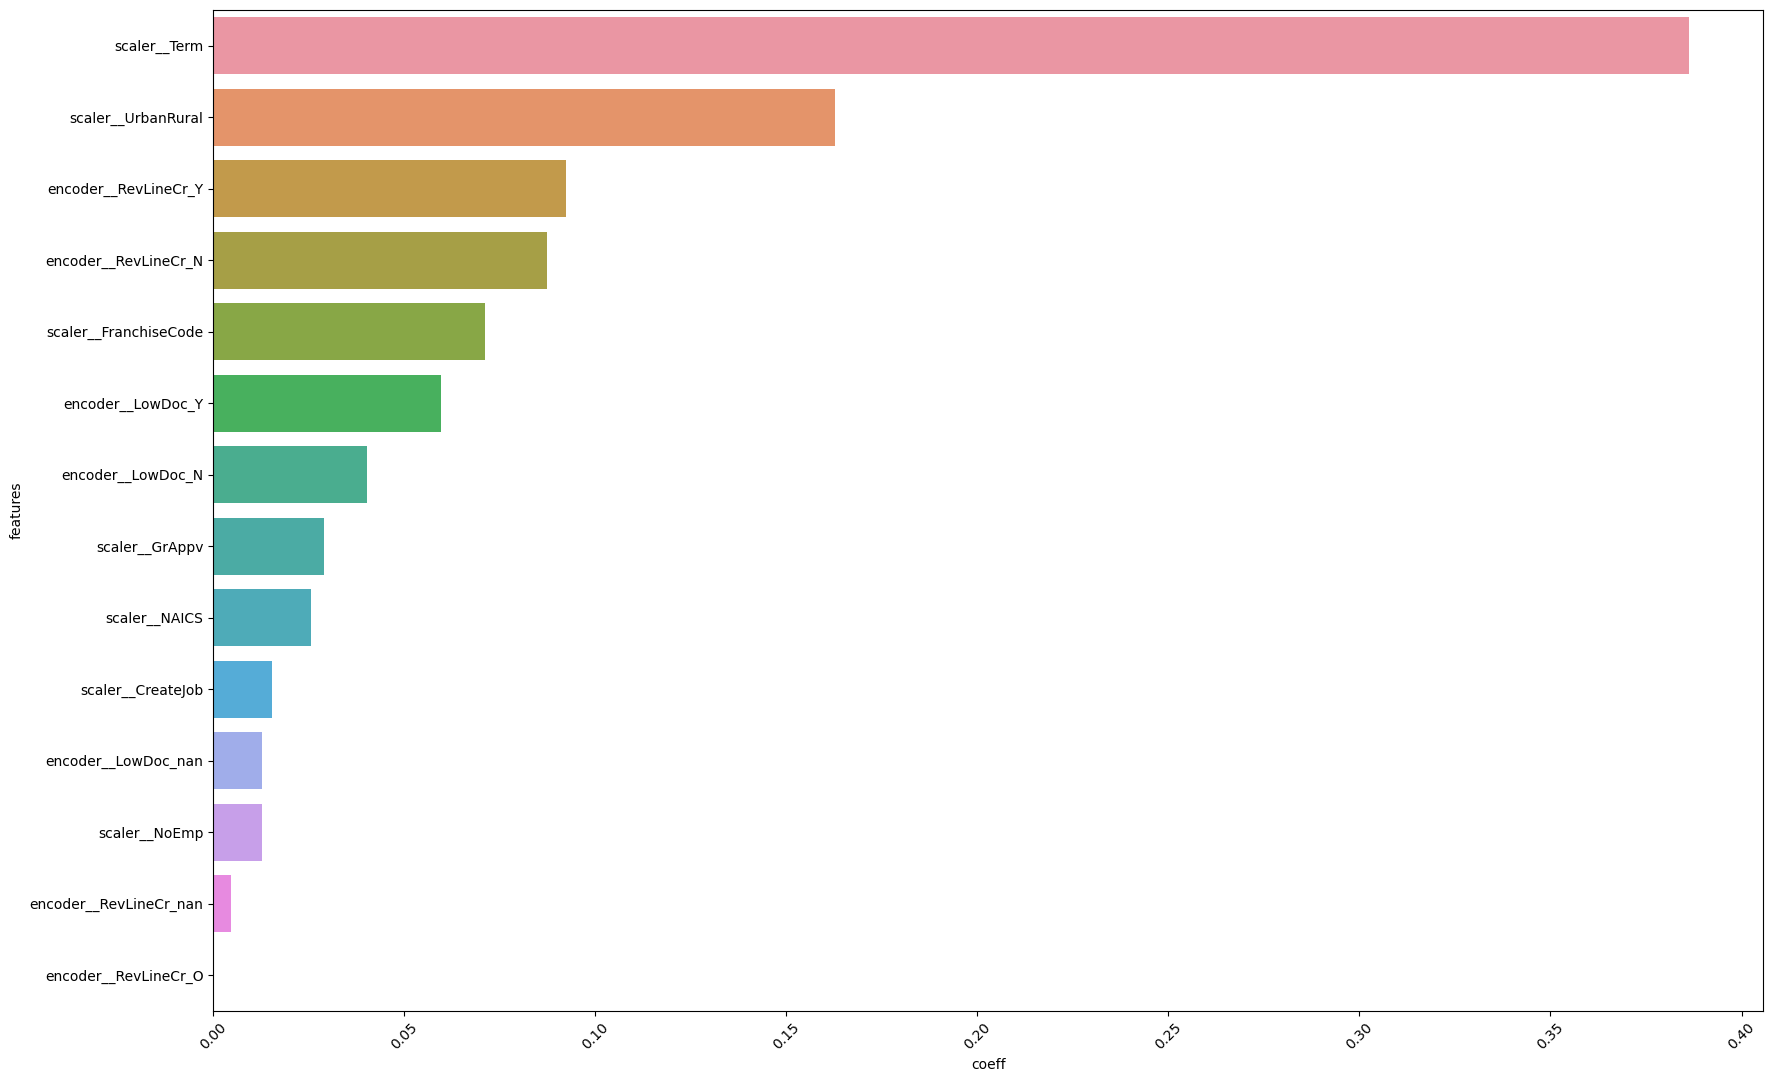

In [98]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
# for threshold in np.linspace(0.35,0.6,20):
xgb = make_pipeline(preprocessor,XGBClassifier(learning_rate=0.38,max_depth=7,min_child_weight=2.6, n_estimators=150))
xgb.fit(X_train,y_train)


#y_pred=xgb.predict(X_test)

# Prédire les probabilités pour les données de test
y_proba = xgb.predict_proba(X_test)
print(y_proba)
# Définir un seuil personnalisé pour la classe positive
threshold = 0.4
y_pred = np.where(y_proba[:,1] > threshold, 1, 0)

print("Classification Report: \n", classification_report(y_test, y_pred))

A=xgb.named_steps['xgbclassifier'].feature_importances_
A_columns=preprocessor.get_feature_names_out()
df_coeff = pd.DataFrame([A_columns,A], index=['features', 'coeff']).T.explode('coeff')
df_coeff=df_coeff.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(20,13))
sns.barplot(x=df_coeff.coeff,y=df_coeff.features)
plt.xticks(rotation=45)
plt.show()

### On enregistre le modèle choisi avec pickle

In [ ]:
pickle_out = open("grid_search.pkl", "wb") 
pickle.dump(grid_search, pickle_out) 
pickle_out.close()